In [57]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split

In [64]:
! head ads.csv

2017-09-13 00:00:00 , 80115
2017-09-13 01:00:00 , 79885
2017-09-13 02:00:00 , 89325
2017-09-13 03:00:00 , 101930
2017-09-13 04:00:00 , 121630
2017-09-13 05:00:00 , 116475
2017-09-13 06:00:00 , 106495
2017-09-13 07:00:00 , 102795
2017-09-13 08:00:00 , 108055
2017-09-13 09:00:00 , 116125


In [92]:
ads = pd.read_csv('ads.csv', index_col=['Time'], parse_dates=['Time'], names=['Time', 'Ads'])

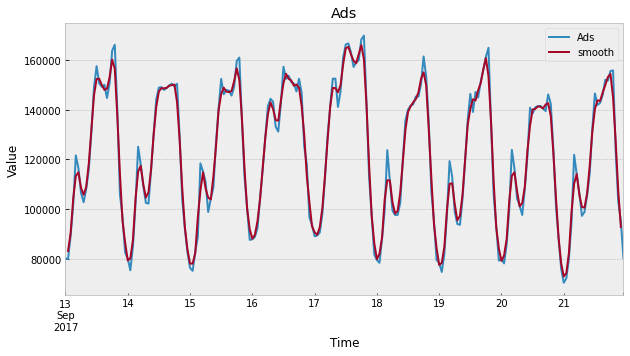

In [93]:
ads['smooth'] = ads.Ads.rolling(3, center=True).mean()
with plt.style.context('bmh'):
    plt.figure(figsize=(10,5))
    ads.Ads.plot(label='Ads')
    ads.smooth.plot(label='smooth')
    plt.title("Ads")
    plt.ylabel("Value")
    plt.legend()
    plt.show()

In [94]:
ads['fsn'] = ads.Ads.shift(24)
ads['rsn'] = ads.Ads - ads.fsn
nads = ads.dropna()
sn_mae = nads.rsn.abs().sum()/len(nads)
mase = nads.rsn.abs().mean()/sn_mae
mase

1.0

In [95]:
ads.Ads.shift(-1)

Time
2017-09-13 00:00:00     79885.0
2017-09-13 01:00:00     89325.0
2017-09-13 02:00:00    101930.0
2017-09-13 03:00:00    121630.0
2017-09-13 04:00:00    116475.0
                         ...   
2017-09-21 19:00:00    123395.0
2017-09-21 20:00:00    103080.0
2017-09-21 21:00:00     95155.0
2017-09-21 22:00:00     80285.0
2017-09-21 23:00:00         NaN
Name: Ads, Length: 216, dtype: float64

In [96]:
import numpy as np
hdummies = pd.get_dummies(ads.index.hour, prefix='h', prefix_sep='').set_index(ads.index)
ads[hdummies.columns] = hdummies
ddummies = pd.get_dummies(ads.index.day_of_week, prefix='d', prefix_sep='').set_index(ads.index)
ads[ddummies.columns] = ddummies
ads

,Ads,smooth,fsn,rsn,h0,h1,h2,h3,h4,h5,...,h21,h22,h23,d0,d1,d2,d3,d4,d5,d6
Time,,,,,,,,,,,,,,,,,,,,,
2017-09-13 00:00:00,80115,NaN,NaN,NaN,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2017-09-13 01:00:00,79885,83108.333333,NaN,NaN,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2017-09-13 02:00:00,89325,90380.000000,NaN,NaN,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2017-09-13 03:00:00,101930,104295.000000,NaN,NaN,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2017-09-13 04:00:00,121630,113345.000000,NaN,NaN,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-09-21 19:00:00,155890,144983.333333,142425.0,13465.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2017-09-21 20:00:00,123395,127455.000000,123945.0,-550.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2017-09-21 21:00:00,103080,107210.000000,101360.0,1720.0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0


In [97]:
ads.dropna(inplace=True)
max_ads = ads.Ads.max()
ads.loc[:, 'Ads'] = ads['Ads']/max_ads
ads

,Ads,smooth,fsn,rsn,h0,h1,h2,h3,h4,h5,...,h21,h22,h23,d0,d1,d2,d3,d4,d5,d6
Time,,,,,,,,,,,,,,,,,,,,,
2017-09-14 00:00:00,0.471601,79326.666667,80115.0,10.0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2017-09-14 01:00:00,0.443408,80188.333333,79885.0,-4550.0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2017-09-14 02:00:00,0.500912,87506.666667,89325.0,-4220.0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2017-09-14 03:00:00,0.600824,104106.666667,101930.0,150.0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2017-09-14 04:00:00,0.736521,115081.666667,121630.0,3505.0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-09-21 18:00:00,0.916215,154448.333333,146215.0,9450.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2017-09-21 19:00:00,0.917540,144983.333333,142425.0,13465.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2017-09-21 20:00:00,0.726280,127455.000000,123945.0,-550.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [98]:
window_size=10
x = np.array([window.values for window in ads.drop(['Ads','smooth', 'fsn', 'rsn'], axis=1).rolling(window_size) if window.shape[0]==window_size][:-1])
y = ads.Ads.values[window_size:]

y = np.expand_dims(y, axis=1)

x_train = x[:166,:,:]
y_train = y[:166,:]

x_test = x[166:, :]
y_test = y[166:, :]

print(x.shape)
print(y.shape)

(181, 10, 31)
(181, 1)


In [143]:
model = keras.Sequential()
model.add(keras.layers.LSTM(64, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(1))
model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(0.0001))
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 64)                24576     
_________________________________________________________________
dense_30 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_31 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 17        
Total params: 27,201
Trainable params: 27,201
Non-trainable params: 0
_________________________________________________________________


In [144]:
early_stopping_monitor = keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0.0, patience=25, restore_best_weights=True)
history = model.fit(x, y, batch_size=32, epochs=250, validation_split=0.1, callbacks=[early_stopping_monitor])

Epoch 1/250
6/6 [==============================] - 1s 63ms/step - loss: 0.4452 - val_loss: 0.4428
Epoch 2/250
6/6 [==============================] - 0s 15ms/step - loss: 0.4046 - val_loss: 0.4279
Epoch 3/250
6/6 [==============================] - 0s 14ms/step - loss: 0.4005 - val_loss: 0.4135
Epoch 4/250
6/6 [==============================] - 0s 13ms/step - loss: 0.3835 - val_loss: 0.3982
Epoch 5/250
6/6 [==============================] - 0s 13ms/step - loss: 0.3610 - val_loss: 0.3833
Epoch 6/250
6/6 [==============================] - 0s 13ms/step - loss: 0.3382 - val_loss: 0.3683
Epoch 7/250
6/6 [==============================] - 0s 13ms/step - loss: 0.3161 - val_loss: 0.3530
Epoch 8/250
6/6 [==============================] - 0s 15ms/step - loss: 0.2904 - val_loss: 0.3371
Epoch 9/250
6/6 [==============================] - 0s 12ms/step - loss: 0.2781 - val_loss: 0.3194
Epoch 10/250
6/6 [==============================] - 0s 13ms/step - loss: 0.2502 - val_loss: 0.3024
Epoch 11/250
6/6 [=

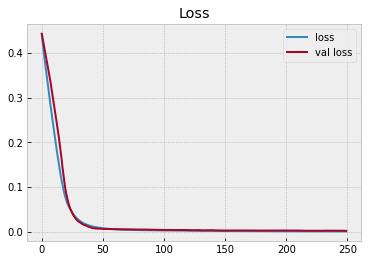

In [146]:
with plt.style.context('bmh'):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val loss')
    plt.title('Loss')
    plt.legend()
    plt.show

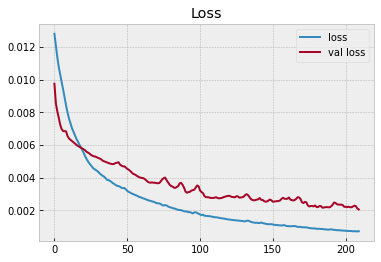

In [147]:
with plt.style.context('bmh'):
    plt.plot(history.history['loss'][40:], label='loss')
    plt.plot(history.history['val_loss'][40:], label='val loss')
    plt.title('Loss')
    plt.legend()
    plt.show

In [148]:
py = model.predict(x)
mase = max_ads*np.abs(y - py).mean()/sn_mae
mase

0.4956247629584428

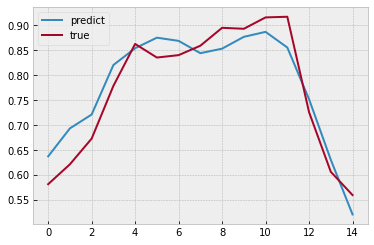

In [150]:
with plt.style.context('bmh'):
    plt.plot(model.predict(x_test), label='predict')
    plt.plot(y_test, label='true')
    plt.legend()


In [128]:
cmodel = keras.Sequential()
cmodel.add(keras.layers.Conv1D(64, 3, input_shape=x_train.shape[1:]))
cmodel.add(keras.layers.MaxPool1D(2))
cmodel.add(keras.layers.Flatten())
cmodel.add(keras.layers.Dense(32, activation='relu'))
cmodel.add(keras.layers.Dense(16, activation='relu'))
cmodel.add(keras.layers.Dense(1))
cmodel.compile(loss='mse', optimizer=keras.optimizers.Adam(0.001))
cmodel.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 8, 64)             6016      
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 4, 64)             0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 32)                8224      
_________________________________________________________________
dense_28 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 17        
Total params: 14,785
Trainable params: 14,785
Non-trainable params: 0
_________________________________________________

In [138]:
esc = keras.callbacks.EarlyStopping(min_delta=0.0, patience=50, restore_best_weights=True)
cmodel.fit(x_train, y_train, validation_split=0.1, callbacks=[esc], epochs=250)

Epoch 1/250
5/5 [==============================] - 0s 17ms/step - loss: 0.0011 - val_loss: 0.0054
Epoch 2/250
5/5 [==============================] - 0s 9ms/step - loss: 0.0010 - val_loss: 0.0053
Epoch 3/250
5/5 [==============================] - 0s 9ms/step - loss: 9.0320e-04 - val_loss: 0.0056
Epoch 4/250
5/5 [==============================] - 0s 10ms/step - loss: 8.1702e-04 - val_loss: 0.0056
Epoch 5/250
5/5 [==============================] - 0s 8ms/step - loss: 7.3532e-04 - val_loss: 0.0053
Epoch 6/250
5/5 [==============================] - 0s 8ms/step - loss: 6.5671e-04 - val_loss: 0.0055
Epoch 7/250
5/5 [==============================] - 0s 9ms/step - loss: 5.7537e-04 - val_loss: 0.0052
Epoch 8/250
5/5 [==============================] - 0s 9ms/step - loss: 5.2583e-04 - val_loss: 0.0051
Epoch 9/250
5/5 [==============================] - 0s 9ms/step - loss: 4.6121e-04 - val_loss: 0.0057
Epoch 10/250
5/5 [==============================] - 0s 10ms/step - loss: 4.1785e-04 - val_loss: 0

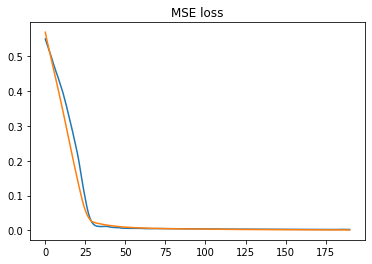

In [139]:
plt.title("MSE loss")
plt.plot(history.history['val_loss'], label='val-loss')
plt.plot(history.history['loss'], label='loss')

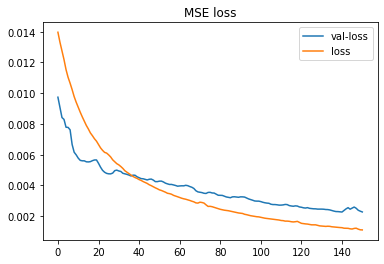

In [140]:
plt.title("MSE loss")
plt.plot(history.history['val_loss'][40:], label='val-loss')
plt.plot(history.history['loss'][40:], label='loss')
plt.legend()

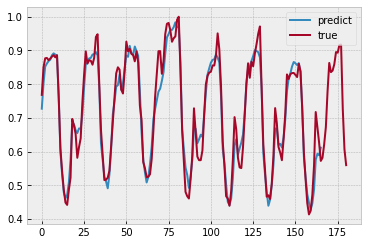

In [141]:
with plt.style.context('bmh'):
    plt.plot(model.predict(x_train), label='predict')
    plt.plot(y, label='true')
    plt.legend()

In [142]:
py = cmodel.predict(x)
mase = max_ads*np.abs(y - py).mean()/sn_mae
mase

0.4886740104975494

In [152]:
from sklearn.metrics import r2_score
r2_score(y, py)


0.9656130918175513

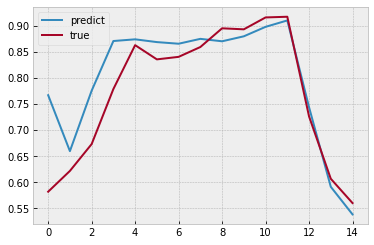

In [149]:
with plt.style.context('bmh'):
    plt.plot(cmodel.predict(x_test), label='predict')
    plt.plot(y_test, label='true')
    plt.legend()

In [192]:
all_data = pd.read_csv('ads.csv', index_col=['Time'], parse_dates=['Time'], names=['Time', 'Ads'])
val_data = all_data.drop(all_data.tail(40).index)
train_data = val_data.drop(val_data.tail(40).index)

In [193]:
train_data.tail()

,Ads
Time,
2017-09-18 11:00:00,135755
2017-09-18 12:00:00,140120
2017-09-18 13:00:00,141730
2017-09-18 14:00:00,142220
2017-09-18 15:00:00,145360


In [184]:
from sklearn.model_selection import TimeSeriesSplit
tss = TimeSeriesSplit(n_splits=30)

In [185]:
data = np.arange(0,150)
for i, (train, val) in enumerate(tss.split(data)):
    print(i, train,val)

0 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24] [25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]
1 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49] [50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73
 74]
2 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74] [75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98
 99]
3 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 